In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('D:/Dixant/CDAC/Machine Learning/17-12-21/Mall_Customers.csv')

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


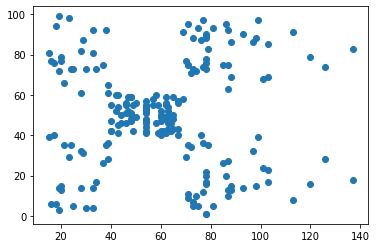

In [4]:
plt.scatter(x=dataset['Annual_Income_(k$)'],y=dataset['Spending_Score'])

In [5]:
dataset.drop(['CustomerID'],axis= 1 ,inplace=True)
dataset.drop(['Genre'],axis= 1 ,inplace=True)
dataset.drop(['Age'],axis= 1 ,inplace=True)
dataset

,Annual_Income_(k$),Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [6]:
from sklearn.cluster import KMeans

In [7]:
sse = []
kmeans = range(1,8)
for k in kmeans:
    km = KMeans(n_clusters=k)
    km.fit(dataset)
    sse.append(km.inertia_)
print(sse)

[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37442.24745037571, 30259.657207285458]


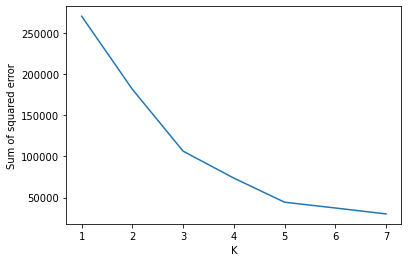

In [8]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(kmeans,sse)

In [9]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(dataset)
y_predicted

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [10]:
km.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571]])

In [11]:
AI=dataset.iloc[:,0]
SS=dataset.iloc[:,1]

In [12]:
AI

0       15
1       15
2       16
3       16
4       17
      ... 
195    120
196    126
197    126
198    137
199    137
Name: Annual_Income_(k$), Length: 200, dtype: int64

In [13]:
df_plot= pd.DataFrame()
df_plot['AI']=np.transpose(AI)
df_plot['SS']=np.transpose(SS)
df_plot['cluster']=y_predicted
df_plot

,AI,SS,cluster
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
...,...,...,...
195,120,79,1
196,126,28,4
197,126,74,1
198,137,18,4


In [14]:
df_plot1 = df_plot[df_plot.cluster==0]
df_plot2 = df_plot[df_plot.cluster==1]
df_plot3 = df_plot[df_plot.cluster==2]
df_plot4 = df_plot[df_plot.cluster==3]
df_plot5 = df_plot[df_plot.cluster==4]

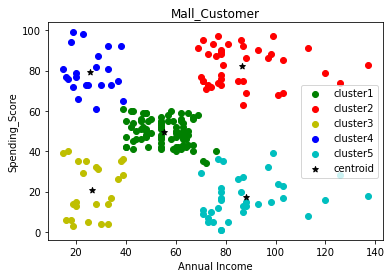

In [15]:
plt.scatter(df_plot1['AI'],df_plot1['SS'],color='g',label='cluster1')
plt.scatter(df_plot2['AI'],df_plot2['SS'],color='r',label='cluster2')
plt.scatter(df_plot3['AI'],df_plot3['SS'],color='y',label='cluster3')
plt.scatter(df_plot4['AI'],df_plot4['SS'],color='b',label='cluster4')
plt.scatter(df_plot5['AI'],df_plot5['SS'],color='c',label='cluster5')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.legend()
plt.xlabel('Annual Income')
plt.ylabel('Spending_Score')
plt.title('Mall_Customer')
plt.show()

# Cluster Evaluation


1.cluster1(green): representing the group of people whose income is low they like spend more.

2.cluster2(red):  representing the group of people whose income is high but they spend less.

3.cluster3(yellow): representing the target group of people whose income is high as well as they spend more.

4.cluster4(blue): representing the group of people whose income is low as well as they spend less.

cluster5(sky blue): representing the group of people whose income is moderate and they spend modrately.

answer to the question is cluster 3

In [16]:
dataset['cluster']=y_predicted

In [19]:
a=np.where(dataset['cluster']==2)

Customer id of people in target group 

In [20]:
a

(array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
        34, 36, 38, 40, 42, 44], dtype=int64),)